In [88]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
pd.options.display.float_format = '{:.2f}'.format

In [89]:
test_ds = pd.read_csv('/data/spotify_data_test.csv', index_col=0)
test_ds.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Views,Likes,Comments,Description,Licensed,official_video,Stream,Artist_encoded,Album_encoded,Album_type_encoded
19563,6ix9ine,https://open.spotify.com/artist/7gZfnEnfiaHzxA...,GOTTI,Day69: Graduation Day,album,spotify:track:27oFpFktCq9JIXjJQRuv7a,0.73,0.58,10.00,-7.25,...,534681903.00,4097001.00,270865.00,"Watch the official music video for ""Gotti"" by ...",False,False,231064701.00,17,2391,0
9743,Wisin,https://open.spotify.com/artist/3E6xrwgnVfYCrC...,Nota de Amor (feat. Daddy Yankee),Los Vaqueros: La Trilogía,album,spotify:track:4YW2Fr25fHwUt6qgvM1iE1,0.81,0.93,10.00,-3.02,...,698259186.00,1929000.00,43155.00,Nota de Amor Official Music Video Get Wisin's ...,True,True,186724705.00,1958,5609,0
355,Beyoncé,https://open.spotify.com/artist/6vWDO969PvNqNY...,Love On Top,4,album,spotify:track:1z6WtY7X4HQJvzxC4UgkSf,0.65,0.75,0.00,-5.25,...,514532529.00,2260106.00,93092.00,Beyoncé's official video for 'Love On Top'. Cl...,True,True,524847088.00,194,194,0
12607,Amitabh Bhattacharya,https://open.spotify.com/artist/2fMqTqiTxUDlmc...,"Kahani (From ""Laal Singh Chaddha"")","Kahani (From ""Laal Singh Chaddha"")",single,spotify:track:7Lcp4QlpR3RDngYejm4fmS,0.41,0.34,1.00,-12.01,...,484988.00,15590.00,524.00,Presenting 'Kahani' - Full Video version. A tr...,True,True,21672529.00,91,4958,2
17678,Saweetie,https://open.spotify.com/artist/6cK3NBO6uP7hh0...,ICY GRL,High Maintenance,album,spotify:track:1sl1cpix9GnwNwaVt04BIu,0.93,0.56,7.00,-5.83,...,131614929.00,1924520.00,37133.00,Watch the official music video for Icy GRL by ...,True,True,198920216.00,1612,4238,0


In [90]:
with open('/models/model.pkl', 'rb') as file:
    model = pickle.load(file)

In [91]:
X_columns = ['Artist_encoded', 'Album_encoded', 'Album_type_encoded',
             'Danceability', 'Energy', 'Key', 'Loudness',
             'Speechiness', 'Acousticness', 'Instrumentalness',
             'Liveness', 'Valence', 'Tempo', 'Duration_ms']
x = test_ds[X_columns]

In [92]:
test_ds['Stream_predicted'] = model.predict(x)

In [93]:
test_ds.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Likes,Comments,Description,Licensed,official_video,Stream,Artist_encoded,Album_encoded,Album_type_encoded,Stream_predicted
19563,6ix9ine,https://open.spotify.com/artist/7gZfnEnfiaHzxA...,GOTTI,Day69: Graduation Day,album,spotify:track:27oFpFktCq9JIXjJQRuv7a,0.73,0.58,10.00,-7.25,...,4097001.00,270865.00,"Watch the official music video for ""Gotti"" by ...",False,False,231064701.00,17,2391,0,232182640.56
9743,Wisin,https://open.spotify.com/artist/3E6xrwgnVfYCrC...,Nota de Amor (feat. Daddy Yankee),Los Vaqueros: La Trilogía,album,spotify:track:4YW2Fr25fHwUt6qgvM1iE1,0.81,0.93,10.00,-3.02,...,1929000.00,43155.00,Nota de Amor Official Music Video Get Wisin's ...,True,True,186724705.00,1958,5609,0,214529495.67
355,Beyoncé,https://open.spotify.com/artist/6vWDO969PvNqNY...,Love On Top,4,album,spotify:track:1z6WtY7X4HQJvzxC4UgkSf,0.65,0.75,0.00,-5.25,...,2260106.00,93092.00,Beyoncé's official video for 'Love On Top'. Cl...,True,True,524847088.00,194,194,0,280507798.99
12607,Amitabh Bhattacharya,https://open.spotify.com/artist/2fMqTqiTxUDlmc...,"Kahani (From ""Laal Singh Chaddha"")","Kahani (From ""Laal Singh Chaddha"")",single,spotify:track:7Lcp4QlpR3RDngYejm4fmS,0.41,0.34,1.00,-12.01,...,15590.00,524.00,Presenting 'Kahani' - Full Video version. A tr...,True,True,21672529.00,91,4958,2,96358139.00
17678,Saweetie,https://open.spotify.com/artist/6cK3NBO6uP7hh0...,ICY GRL,High Maintenance,album,spotify:track:1sl1cpix9GnwNwaVt04BIu,0.93,0.56,7.00,-5.83,...,1924520.00,37133.00,Watch the official music video for Icy GRL by ...,True,True,198920216.00,1612,4238,0,154727555.17


In [98]:
abs_error = abs(test_ds['Stream'] - test_ds['Stream_predicted'])
test_ds['Absolute_error'] = abs_error
test_ds['Squared_error'] = abs_error ** 2
test_ds['Relative_error'] = (test_ds['Absolute_error'] / test_ds['Stream']) * 100

columns = ['Artist', 'Track', 'Album', 'Stream', 'Stream_predicted', 'Absolute_error', 'Squared_error', 'Relative_error']
print(f"MAE = {test_ds['Absolute_error'].sum() / len(test_ds)}")
print(f"MRE = {test_ds['Relative_error'].sum() / len(test_ds)}")
print(f"MSE = {test_ds['Squared_error'].sum() / len(test_ds)}")
print(f"RMSE = {math.sqrt(test_ds['Squared_error'].sum() / len(test_ds))}")
test_ds[columns]

MAE = 128564348.69067037
MRE = 2028.6943893211474
MSE = 4.421697499975842e+16
RMSE = 210278327.46091172


,Artist,Track,Album,Stream,Stream_predicted,Absolute_error,Squared_error,Relative_error
19563,6ix9ine,GOTTI,Day69: Graduation Day,231064701.00,232182640.56,1117939.56,1249788851428.46,0.48
9743,Wisin,Nota de Amor (feat. Daddy Yankee),Los Vaqueros: La Trilogía,186724705.00,214529495.67,27804790.67,773106384133006.38,14.89
355,Beyoncé,Love On Top,4,524847088.00,280507798.99,244339289.01,59701688155744856.00,46.55
12607,Amitabh Bhattacharya,"Kahani (From ""Laal Singh Chaddha"")","Kahani (From ""Laal Singh Chaddha"")",21672529.00,96358139.00,74685610.00,5577940340511958.00,344.61
17678,Saweetie,ICY GRL,High Maintenance,198920216.00,154727555.17,44192660.83,1952991271345899.00,22.22
...,...,...,...,...,...,...,...,...
17876,Loud Luxury,These Nights,These Nights,22057596.00,111540173.78,89482577.78,8007131726824869.00,405.68
15853,Santhosh Narayanan,Enjoy Enjaami,Enjoy Enjaami,32595514.00,76486192.59,43890678.59,1926391667090684.75,134.65
2567,Coolio,Fantastic Voyage,It Takes a Thief,24087037.00,122177210.08,98090173.08,9621682055845258.00,407.23
20616,Bailey Zimmerman,Fall In Love,Fall In Love,101104052.00,73645240.54,27458811.46,753986326820789.50,27.16


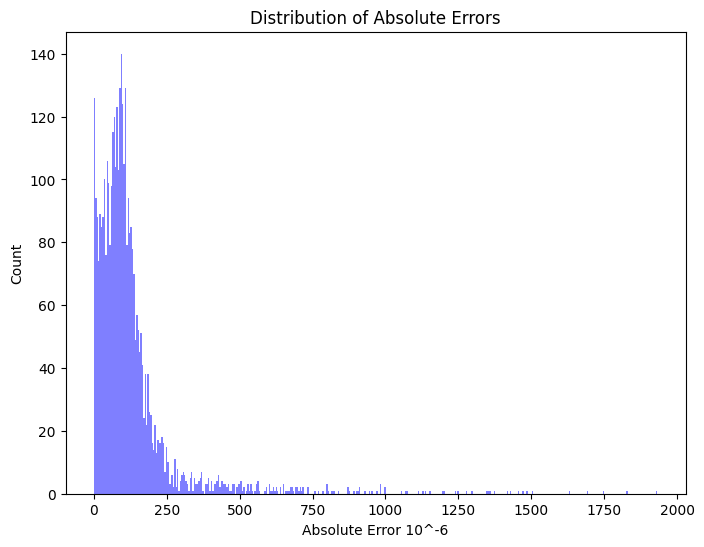

In [115]:
# Код для побудови графіка розподілу абсолютних похибок
plt.figure(figsize=(8, 6))
plt.hist(test_ds['Absolute_error'] // 1_000_000, bins=400, color='blue', alpha=0.5)
plt.xlabel('Absolute Error 10^-6')
plt.ylabel('Count')
plt.title('Distribution of Absolute Errors')
plt.ticklabel_format(style='plain', axis='x')  # Оновлення формату значень по осі X
plt.show()


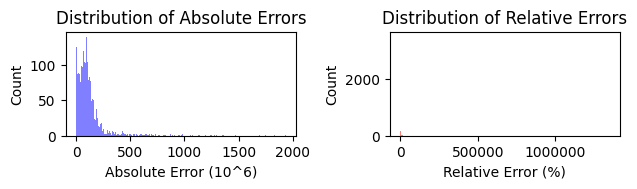

In [118]:
# Графік розподілу абсолютних похибок
plt.subplot(2, 2, 1)
plt.hist(test_ds['Absolute_error'] // 1_000_000, bins=400, color='blue', alpha=0.5)
plt.xlabel('Absolute Error (10^6)')
plt.ylabel('Count')
plt.title('Distribution of Absolute Errors')
plt.ticklabel_format(style='plain', axis='x')  # Оновлення формату значень по осі X

# Графік розподілу відносних похибок
plt.subplot(2, 2, 2)
plt.hist(test_ds['Relative_error'], bins=600, color='red', alpha=0.5)
plt.xlabel('Relative Error (%)')
plt.ylabel('Count')
plt.title('Distribution of Relative Errors')
plt.ticklabel_format(style='plain', axis='x')  # Оновлення формату значень по осі X

plt.tight_layout()  # Забезпечує відстань між графіками
plt.show()

In [95]:
test_ds.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Likes,Comments,Stream,Artist_encoded,Album_encoded,Album_type_encoded,Stream_predicted,Absolute_error,Squared_error,Relative_error
count,3834.00,3834.00,3834.00,3834.00,3834.00,3834.00,3834.00,3834.00,3834.00,3834.00,...,3834.00,3834.00,3834.00,3834.00,3834.00,3834.00,3834.00,3834.00,3834.00,3834.00
mean,0.62,0.64,5.24,-7.57,0.10,0.29,0.05,0.19,0.53,120.73,...,658866.46,25667.36,135750997.31,1022.71,5660.61,0.52,150102463.01,128564348.69,44216974999758416.00,2028.69
std,0.16,0.21,3.61,4.39,0.10,0.28,0.18,0.17,0.24,29.22,...,1550585.09,118513.38,237376790.72,592.55,3257.28,0.86,79096598.58,166419370.50,194992245953731776.00,25626.43
min,0.00,0.00,0.00,-41.70,0.00,0.00,0.00,0.02,0.00,0.00,...,7.00,0.00,7771.00,0.00,1.00,0.00,11447046.93,22578.97,509809942.71,0.02
25%,0.52,0.51,2.00,-8.79,0.04,0.05,0.00,0.09,0.34,97.63,...,25382.25,598.00,17312712.00,512.00,2864.75,0.00,104121565.80,50613110.75,2561687688546397.00,49.81
50%,0.64,0.67,5.00,-6.58,0.05,0.19,0.00,0.12,0.54,119.99,...,138538.00,3713.00,50309072.00,1021.00,5643.50,0.00,138743579.57,92782023.02,8608504062571180.00,150.96
75%,0.74,0.80,8.00,-4.93,0.11,0.47,0.00,0.23,0.72,139.95,...,557111.00,15025.75,134785411.00,1538.75,8530.75,1.00,179705463.96,140087509.03,19624513792082796.00,586.22
max,0.97,1.00,11.00,0.52,0.96,1.00,1.00,0.98,0.98,243.37,...,26446178.00,3486944.00,2365777505.00,2039.00,11215.00,2.00,1103465891.69,1933015038.43,3736547138811031552.00,1348580.65


In [126]:
rel_error_quartile = np.percentile(test_ds['Relative_error'], 50)
rel_ds = test_ds[test_ds['Relative_error'] <= rel_error_quartile]
print(f"Розмір датасету з відносною похибкою: {len(rel_ds)}")

Розмір датасету з відносною похибкою: 1917


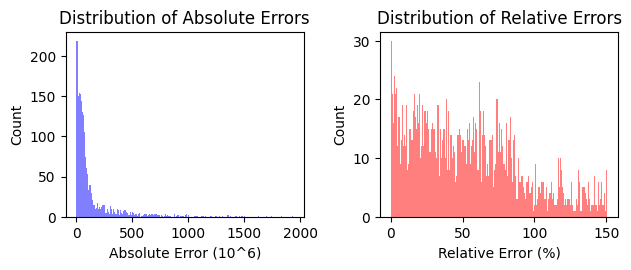

In [122]:
# Графік розподілу абсолютних похибок
plt.subplot(2, 2, 1)
plt.hist(rel_ds['Absolute_error'] // 1_000_000, bins=200, color='blue', alpha=0.5)
plt.xlabel('Absolute Error (10^6)')
plt.ylabel('Count')
plt.title('Distribution of Absolute Errors')
plt.ticklabel_format(style='plain', axis='x')  # Оновлення формату значень по осі X

# Графік розподілу відносних похибок
plt.subplot(2, 2, 2)
plt.hist(rel_ds['Relative_error'], bins=200, color='red', alpha=0.5)
plt.xlabel('Relative Error (%)')
plt.ylabel('Count')
plt.title('Distribution of Relative Errors')
plt.ticklabel_format(style='plain', axis='x')  # Оновлення формату значень по осі X

plt.tight_layout()  # Забезпечує відстань між графіками
plt.show()

In [127]:
rel_ds[['Stream', 'Stream_predicted', 'Absolute_error', 'Relative_error']].describe()

,Stream,Stream_predicted,Absolute_error,Relative_error
count,1917.00,1917.00,1917.00,1917.00
mean,248879258.28,159442165.96,138988673.67,53.97
std,294532481.43,95872519.28,229464041.07,37.80
min,8296487.00,12895581.62,22578.97,0.02
25%,79326817.00,106084436.98,26516862.46,22.27
50%,134799456.00,144029118.67,58494379.11,49.80
75%,283753790.00,188272902.94,124132739.01,77.78
max,2365777505.00,1103465891.69,1933015038.43,150.85


In [128]:
rel_ds[['Stream', 'Stream_predicted', 'Absolute_error', 'Relative_error']]

,Stream,Stream_predicted,Absolute_error,Relative_error
19563,231064701.00,232182640.56,1117939.56,0.48
9743,186724705.00,214529495.67,27804790.67,14.89
355,524847088.00,280507798.99,244339289.01,46.55
17678,198920216.00,154727555.17,44192660.83,22.22
15042,64807738.00,128397725.94,63589987.94,98.12
...,...,...,...,...
8571,61921081.00,74395842.39,12474761.39,20.15
965,35521827.00,62955355.88,27433528.88,77.23
15853,32595514.00,76486192.59,43890678.59,134.65
20616,101104052.00,73645240.54,27458811.46,27.16


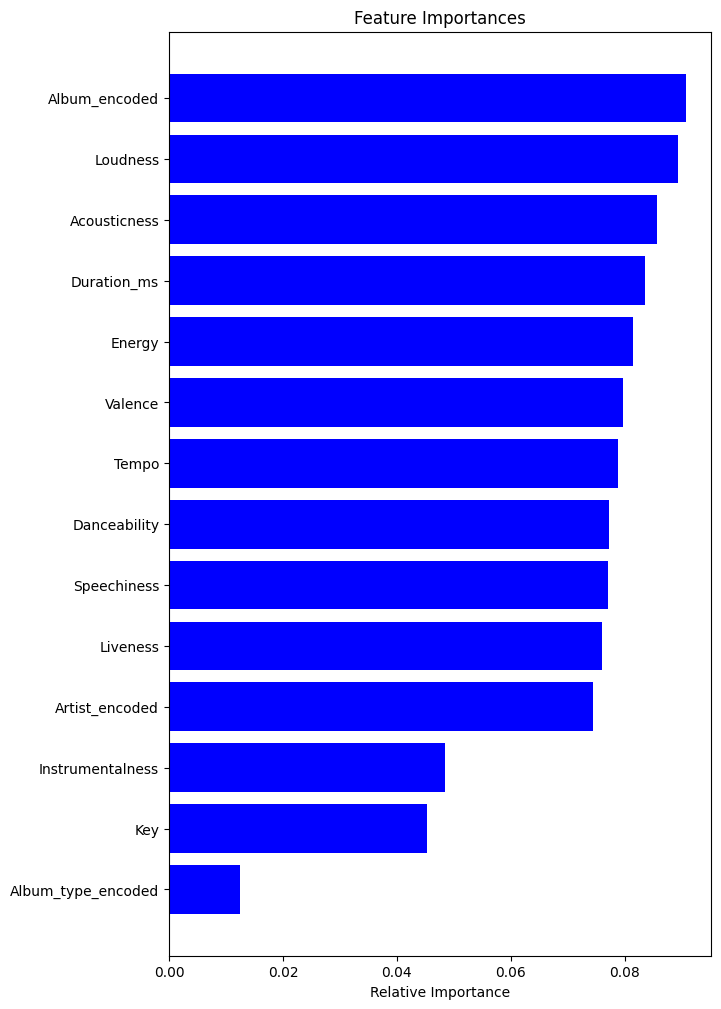

In [96]:
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(7, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()